In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
import gensim
import numpy as np
from tensorflow import keras
import tensorflow as tf
from textblob import TextBlob
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

In [2]:
dataset = load_dataset("amazon_us_reviews", "Digital_Software_v1_00")

Found cached dataset amazon_us_reviews (C:/Users/Arshad's pc/.cache/huggingface/datasets/amazon_us_reviews/Digital_Software_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = pd.DataFrame.from_dict(dataset["train"])

In [4]:
df.to_csv("amazon_us_reviews_apparel.csv", index=False)

In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,0,1,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,0,1,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,0,1,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,0,1,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,0,1,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102084 entries, 0 to 102083
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        102084 non-null  object
 1   customer_id        102084 non-null  object
 2   review_id          102084 non-null  object
 3   product_id         102084 non-null  object
 4   product_parent     102084 non-null  object
 5   product_title      102084 non-null  object
 6   product_category   102084 non-null  object
 7   star_rating        102084 non-null  int64 
 8   helpful_votes      102084 non-null  int64 
 9   total_votes        102084 non-null  int64 
 10  vine               102084 non-null  int64 
 11  verified_purchase  102084 non-null  int64 
 12  review_headline    102084 non-null  object
 13  review_body        102084 non-null  object
 14  review_date        102084 non-null  object
dtypes: int64(5), object(10)
memory usage: 11.7+ MB


<AxesSubplot:xlabel='star_rating', ylabel='count'>

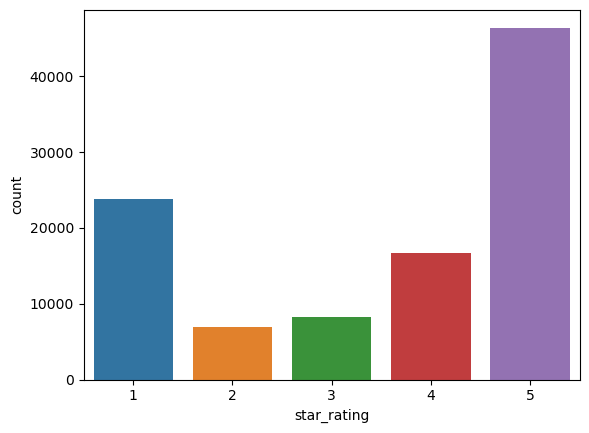

In [7]:
sns.countplot(x='star_rating', data=df)

Text(0, 0.5, 'Count')

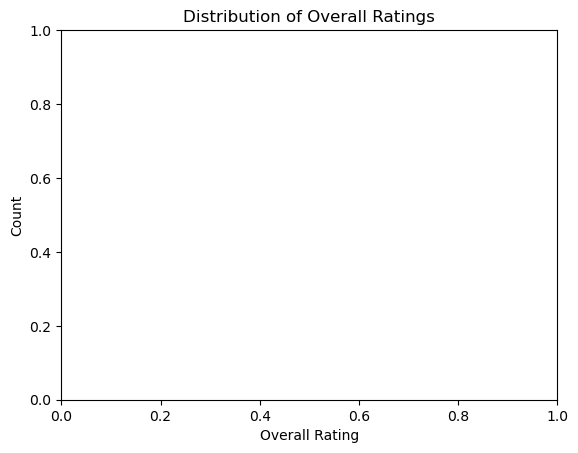

In [8]:
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')

In [9]:
plt.show()

In [10]:
X = df["star_rating"]
y = df["helpful_votes"]

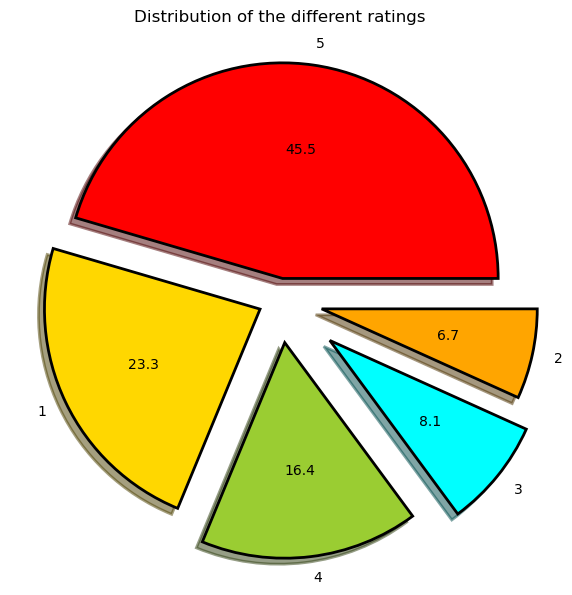

In [11]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['star_rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

In [12]:
df.drop(['review_id', 'review_date'], axis=1, inplace=True)
df.dropna(inplace=True)

In [13]:
df['sentiment'] = df['star_rating'].apply(lambda x: 1 if x >= 3 else 0)
df.drop(['star_rating'], axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['review_body'], df['sentiment'], test_size=0.2, random_state=42)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['review_body'], df['sentiment'], test_size=0.2, random_state=42)


In [16]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [17]:
text_seq = tokenizer.texts_to_sequences("review_body")
text_seq = pad_sequences(text_seq, maxlen=100)

In [18]:
X_train_padded = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

In [19]:
word2vec_model = api.load('word2vec-google-news-300')

In [21]:
embedding_matrix = np.zeros((10000, 300))

# Assign embedding vectors to the matrix
for word, i in tokenizer.word_index.items():
    if i >= 10000:
        break
    if word in word2vec_model:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

In [22]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Bidirectional(LSTM(64, dropout=0.2)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train_padded, y_train, batch_size=64, epochs=5, validation_data=(X_test_padded, y_test))

Epoch 1/5
1277/1277 [==============================] - 609s 434ms/step - loss: 0.3841 - accuracy: 0.8210 - val_loss: 0.3351 - val_accuracy: 0.8443
Epoch 2/5
1277/1277 [==============================] - 447s 350ms/step - loss: 0.2985 - accuracy: 0.8668 - val_loss: 0.2726 - val_accuracy: 0.8756
Epoch 3/5
1277/1277 [==============================] - 353s 276ms/step - loss: 0.2655 - accuracy: 0.8840 - val_loss: 0.2566 - val_accuracy: 0.8845
Epoch 4/5
1277/1277 [==============================] - 356s 279ms/step - loss: 0.2481 - accuracy: 0.8922 - val_loss: 0.2514 - val_accuracy: 0.8882
Epoch 5/5
1277/1277 [==============================] - 354s 278ms/step - loss: 0.2389 - accuracy: 0.8963 - val_loss: 0.2572 - val_accuracy: 0.8901


In [24]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

639/639 [==============================] - 41s 65ms/step - loss: 0.2572 - accuracy: 0.8901
Test loss: 0.2571956217288971
Test accuracy: 0.890091598033905


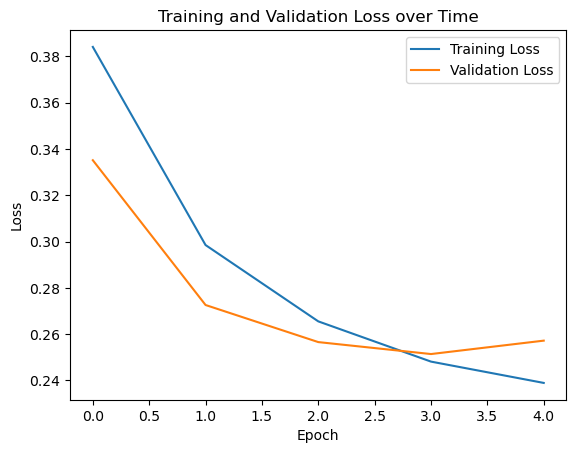

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

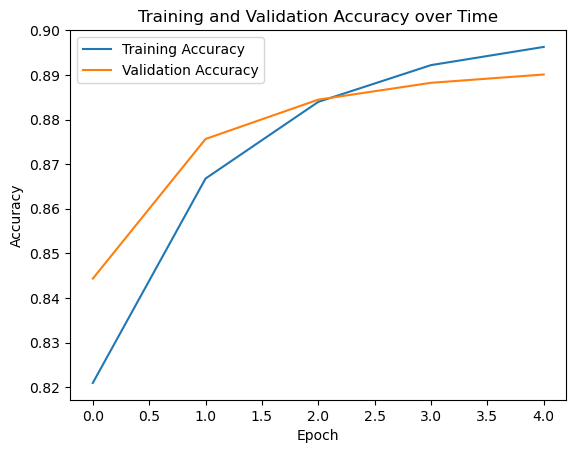

In [26]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D()
    ])

In [28]:
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [29]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history_cnn = model_cnn.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
1277/1277 [==============================] - 65s 50ms/step - loss: 0.3384 - accuracy: 0.8449 - val_loss: 0.2765 - val_accuracy: 0.8763
Epoch 2/10
1277/1277 [==============================] - 67s 52ms/step - loss: 0.2636 - accuracy: 0.8868 - val_loss: 0.2630 - val_accuracy: 0.8840
Epoch 3/10
1277/1277 [==============================] - 65s 51ms/step - loss: 0.2336 - accuracy: 0.9019 - val_loss: 0.2603 - val_accuracy: 0.8867
Epoch 4/10
1277/1277 [==============================] - 66s 52ms/step - loss: 0.2053 - accuracy: 0.9143 - val_loss: 0.2710 - val_accuracy: 0.8868
Epoch 5/10
1277/1277 [==============================] - 84s 66ms/step - loss: 0.1795 - accuracy: 0.9252 - val_loss: 0.2821 - val_accuracy: 0.8843
Epoch 6/10
1277/1277 [==============================] - 103s 81ms/step - loss: 0.1567 - accuracy: 0.9347 - val_loss: 0.3073 - val_accuracy: 0.8829
Epoch 7/10
1277/1277 [==============================] - 103s 81ms/step - loss: 0.1336 - accuracy: 0.9456 - val_loss: 0.3675

In [31]:
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test)
print("CNN Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

639/639 [==============================] - 6s 9ms/step - loss: 0.4751 - accuracy: 0.8780
CNN Model - Loss: 0.48, Accuracy: 87.80%


In [32]:
model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    GRU(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [33]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history_gru = model_gru.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
1277/1277 [==============================] - 163s 125ms/step - loss: 0.4564 - accuracy: 0.7783 - val_loss: 0.3108 - val_accuracy: 0.8604
Epoch 2/10
1277/1277 [==============================] - 167s 131ms/step - loss: 0.2977 - accuracy: 0.8673 - val_loss: 0.2812 - val_accuracy: 0.8747
Epoch 3/10
1277/1277 [==============================] - 437s 342ms/step - loss: 0.2736 - accuracy: 0.8795 - val_loss: 0.2658 - val_accuracy: 0.8813
Epoch 4/10
1277/1277 [==============================] - 240s 188ms/step - loss: 0.2574 - accuracy: 0.8876 - val_loss: 0.2560 - val_accuracy: 0.8853
Epoch 5/10
1277/1277 [==============================] - 284s 222ms/step - loss: 0.2444 - accuracy: 0.8931 - val_loss: 0.2470 - val_accuracy: 0.8921
Epoch 6/10
1277/1277 [==============================] - 250s 196ms/step - loss: 0.2349 - accuracy: 0.8971 - val_loss: 0.2399 - val_accuracy: 0.8936
Epoch 7/10
1277/1277 [==============================] - 186s 146ms/step - loss: 0.2263 - accuracy: 0.9030 - val_

In [35]:
loss, accuracy = model_gru.evaluate(X_test_padded, y_test)
print("GRU Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

639/639 [==============================] - 26s 41ms/step - loss: 0.2446 - accuracy: 0.8945
GRU Model - Loss: 0.24, Accuracy: 89.45%


In [36]:
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    LSTM(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [37]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history_lstm = model_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
1277/1277 [==============================] - 266s 205ms/step - loss: 0.5191 - accuracy: 0.7389 - val_loss: 0.3765 - val_accuracy: 0.8212
Epoch 2/10
1277/1277 [==============================] - 231s 181ms/step - loss: 0.3348 - accuracy: 0.8490 - val_loss: 0.3134 - val_accuracy: 0.8644
Epoch 3/10
1277/1277 [==============================] - 245s 192ms/step - loss: 0.2986 - accuracy: 0.8669 - val_loss: 0.2783 - val_accuracy: 0.8748
Epoch 4/10
1277/1277 [==============================] - 225s 176ms/step - loss: 0.2777 - accuracy: 0.8783 - val_loss: 0.2691 - val_accuracy: 0.8790
Epoch 5/10
1277/1277 [==============================] - 250s 195ms/step - loss: 0.2651 - accuracy: 0.8836 - val_loss: 0.2571 - val_accuracy: 0.8858
Epoch 6/10
1277/1277 [==============================] - 249s 195ms/step - loss: 0.2535 - accuracy: 0.8895 - val_loss: 0.2514 - val_accuracy: 0.8892
Epoch 7/10
1277/1277 [==============================] - 249s 195ms/step - loss: 0.2457 - accuracy: 0.8926 - val_

In [39]:
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test)
print("LSTM Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

639/639 [==============================] - 28s 44ms/step - loss: 0.2791 - accuracy: 0.8823
LSTM Model - Loss: 0.28, Accuracy: 88.23%


In [46]:
model_gru.save('model_gru.h5')

In [47]:
model = load_model('model_gru.h5')

In [ ]:
def analyze_sentiment(text):
    
    text = input(text)

    # split the input text into individual sentences
    sentences = sent_tokenize(text)

    # preprocess the sentences
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(sentences)
    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(sequences, maxlen=100)

    # make a prediction using the model
    predictions = model.predict(padded_sequences)